In [118]:
# Carregamento e Tratamento de Dados
import pandas as pd
import numpy as np

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento, Modelagem e Avaliação
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

___
### Tratamento da Base de Dados

In [119]:
# Adicionando os nomes das colunas

columns_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over',
    'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive',
    'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your',
    'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
    'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data',
    'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
    'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
    'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
    'capital_run_length_longest', 'capital_run_length_total', 'spam'
]

df = pd.read_csv('data/spambase.data', names=columns_names)


___
### Análise Geral dos Dados

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [121]:
df.head(3)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


In [122]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


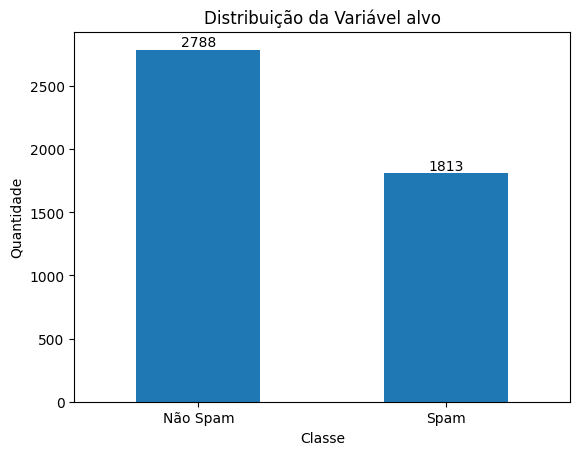

In [123]:
# Plot Distribuição da variável target com contagem em cima da barra
df['spam'].value_counts(normalize=False).plot(kind='bar')
plt.title('Distribuição da Variável alvo')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks([0, 1], ['Não Spam', 'Spam'], rotation=0)
for i in range(2):
    plt.text(i, df['spam'].value_counts()[i], df['spam'].value_counts()[i], ha='center', va='bottom')
plt.show()

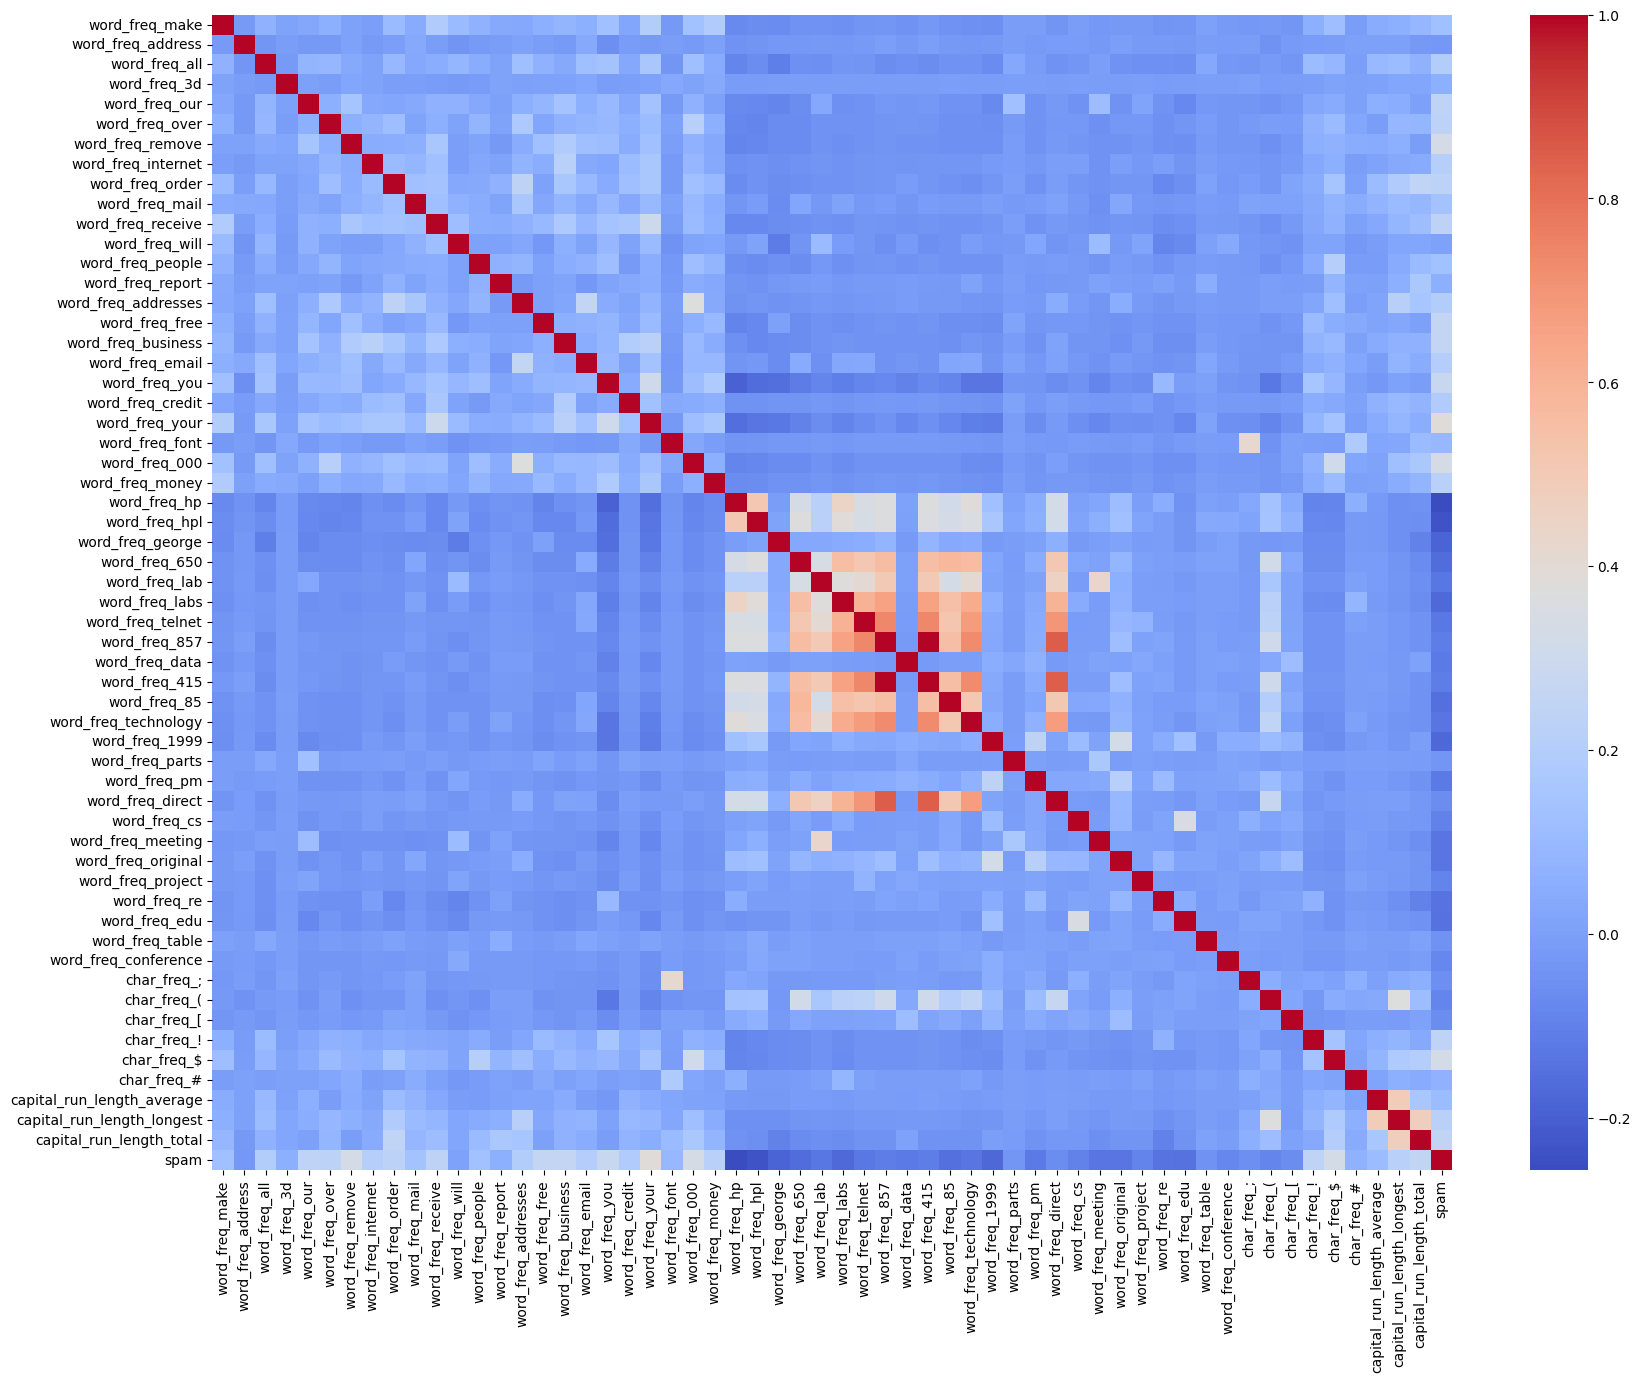

In [124]:
# Correlação entre as variáveis
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()

In [125]:
# Lista as variáveis mais correlacionadas com a variável target
df.corr()['spam'].sort_values(ascending=False)

spam                          1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capital_run_length_average    0.109999
word_freq_font           

___
### Processamento dos Dados e Busca por Hiperparâmetros

In [126]:
# Separando a variável alvo das variáveis independentes
X = df.drop('spam', axis=1)
Y = df['spam']

# Dividindo os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Padronizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definindo os parâmetros que queremos testar
param_dist = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Criando o modelo KNN
knn = KNeighborsClassifier()

# Usando RandomizedSearchCV para encontrar os melhores hiperparâmetros
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=100, cv=10, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, Y_train)

# Melhores hiperparâmetros encontrados
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

print(f'Melhores hiperparâmetros: {best_params}')

Melhores hiperparâmetros: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan'}


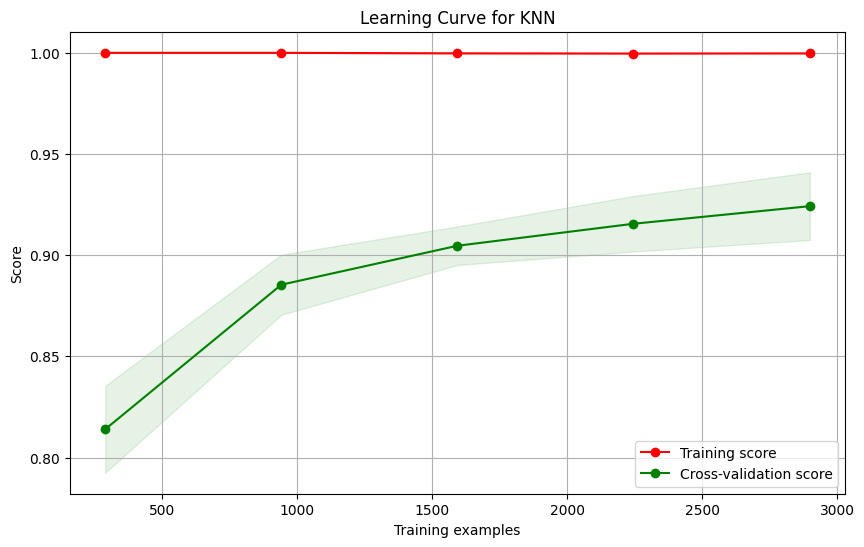

In [127]:
# Plotando curva de aprendizado para o melhor configuração de K incluindo treino teste e validação cruzada com linhas horizontais

from sklearn.model_selection import learning_curve

k = best_params['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=k, weights=best_params['weights'], metric=best_params['metric'])
knn.fit(X_train, Y_train)

train_sizes, train_scores, test_scores = learning_curve(knn, X_train, Y_train, cv=10, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve for KNN')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid()
plt.legend(loc='best')
plt.show()

In [128]:
# coletando as métricas de Acurácia, precision, recall e f1-score
Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

train_precision = precision_score(Y_train, Y_train_pred)
test_precision = precision_score(Y_test, Y_test_pred)

train_recall = recall_score(Y_train, Y_train_pred)
test_recall = recall_score(Y_test, Y_test_pred)

train_f1 = f1_score(Y_train, Y_train_pred)
test_f1 = f1_score(Y_test, Y_test_pred)

print(f'Acurácia - Treino: {train_accuracy:.4f} - Teste: {test_accuracy:.4f}')
print(f'Precision - Treino: {train_precision:.4f} - Teste: {test_precision:.4f}')
print(f'Recall - Treino: {train_recall:.4f} - Teste: {test_recall:.4f}')
print(f'F1-Score - Treino: {train_f1:.4f} - Teste: {test_f1:.4f}')

Acurácia - Treino: 0.9997 - Teste: 0.9182
Precision - Treino: 1.0000 - Teste: 0.9585
Recall - Treino: 0.9992 - Teste: 0.8406
F1-Score - Treino: 0.9996 - Teste: 0.8957


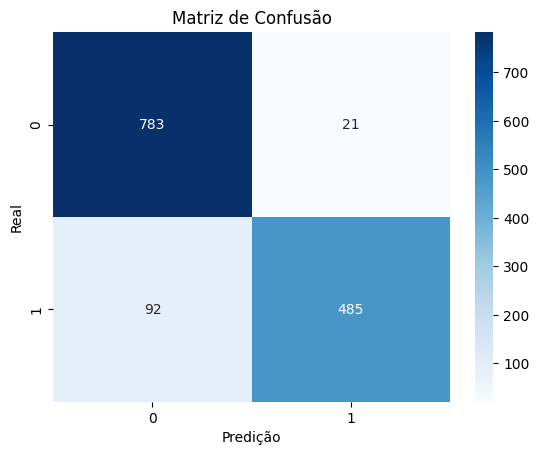

In [129]:
# Plotando a matriz de confusão
conf_matrix = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

___
## Teste de Treino com Melhor Configuração

Para cada metrica de avaliação, plot a curva de aprendizagem para os
classificadores com a melhor configuração de hiper-parametros. Mais
precisamente, considere conjuntos de treinamento e teste de (5%, 95%) a
(95%, 5%) do conjunto original de treinamento, com passo de 5% (usando
amostragem estratificada). Para cada par de conjuntos de treinamento e teste,
compute as metricas de avaliação. Comente.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


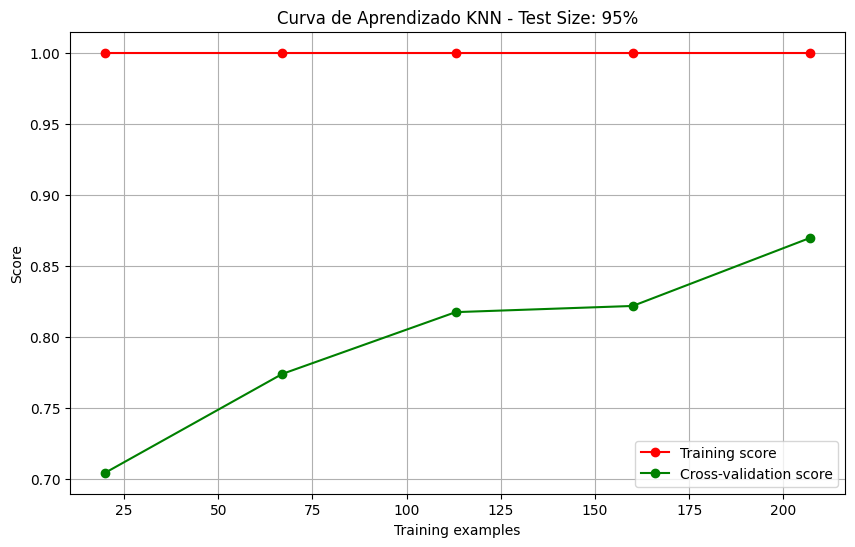

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


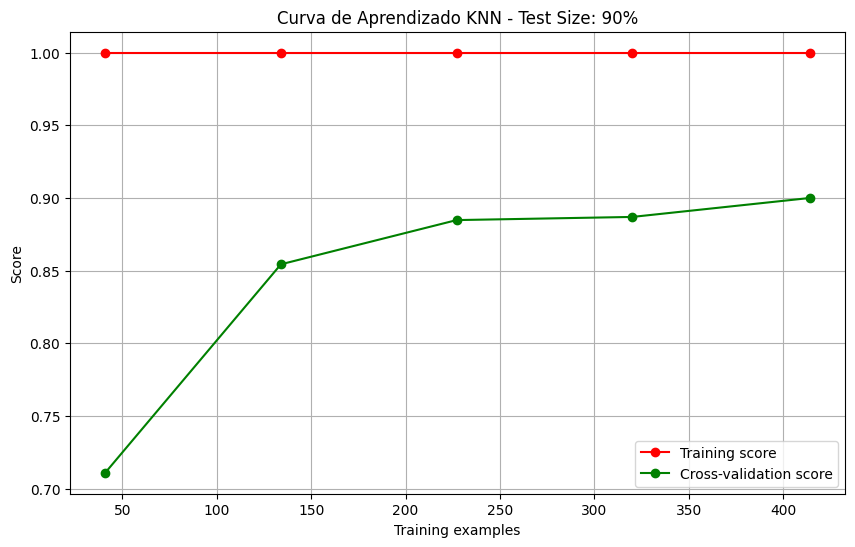

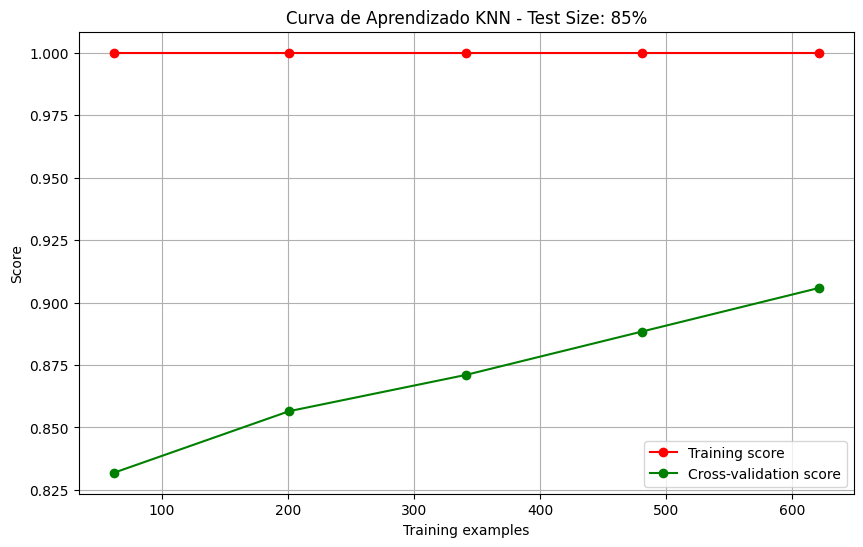

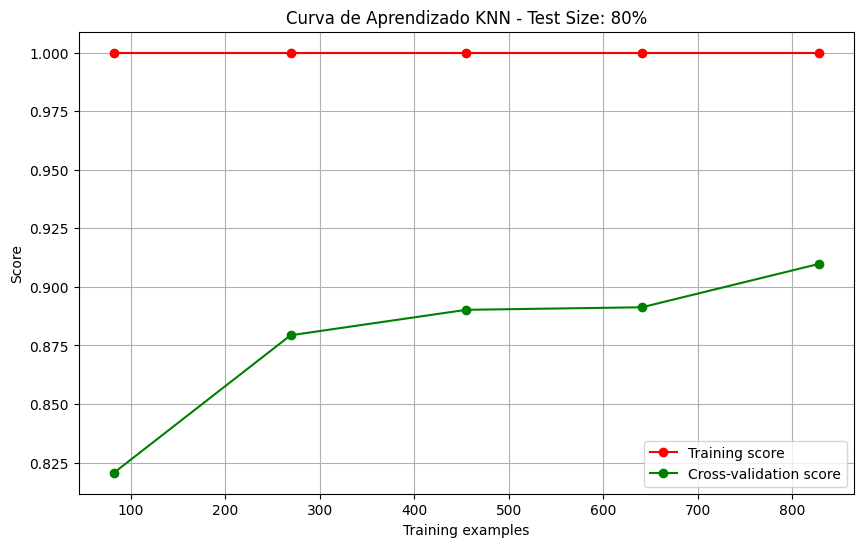

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


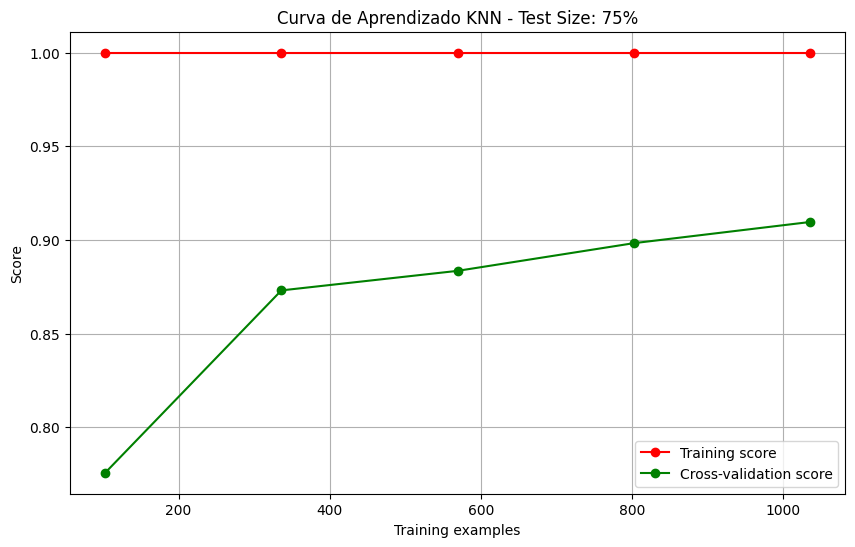

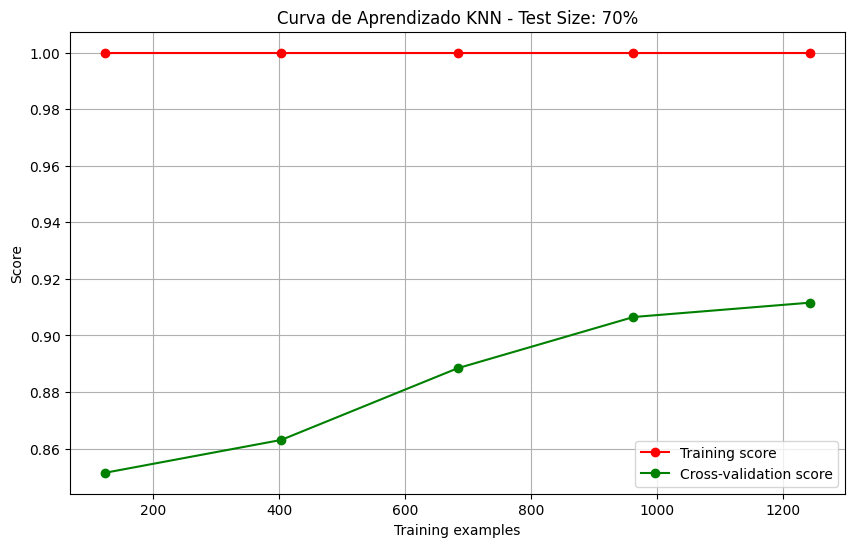

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


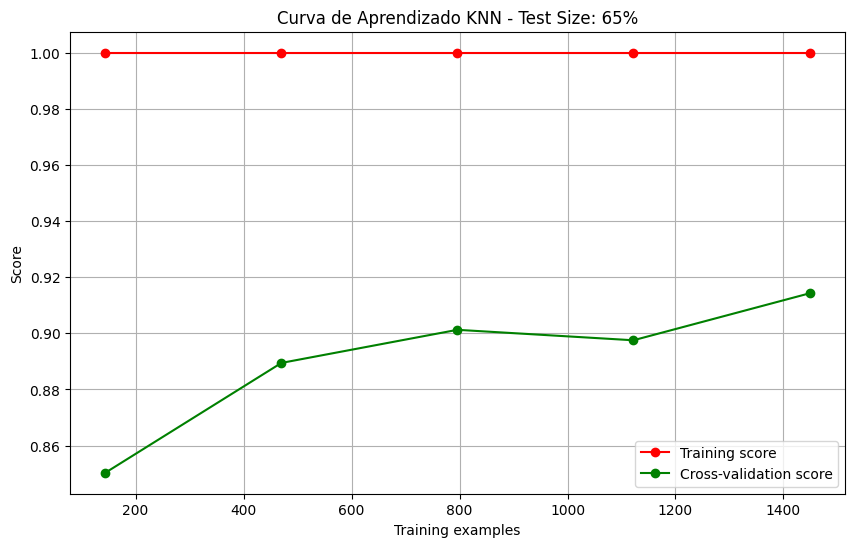

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


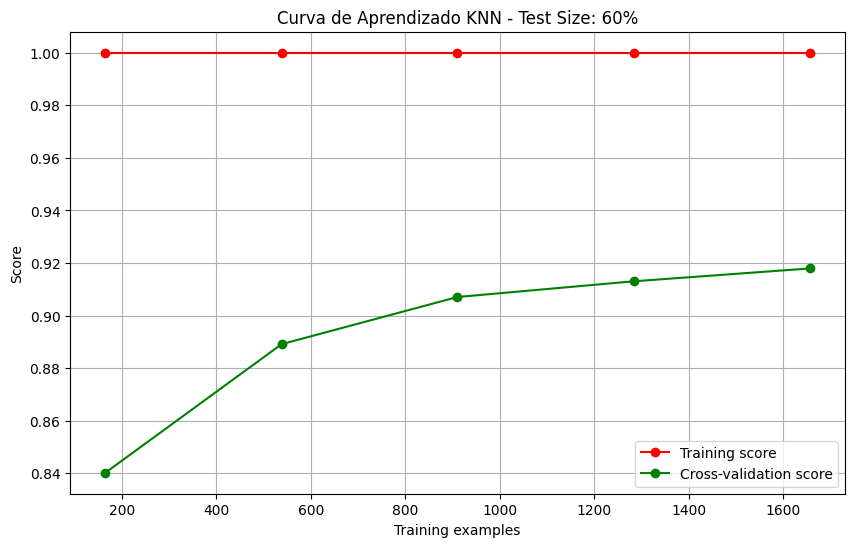

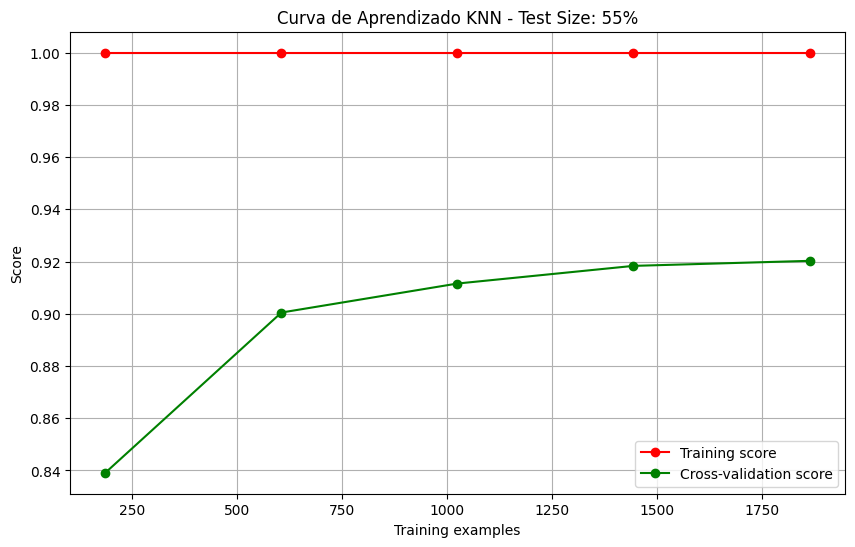

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


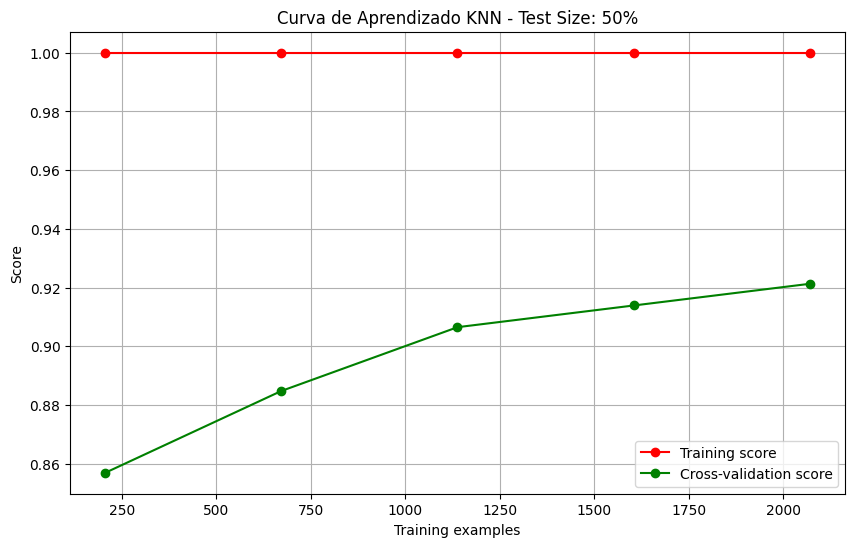

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


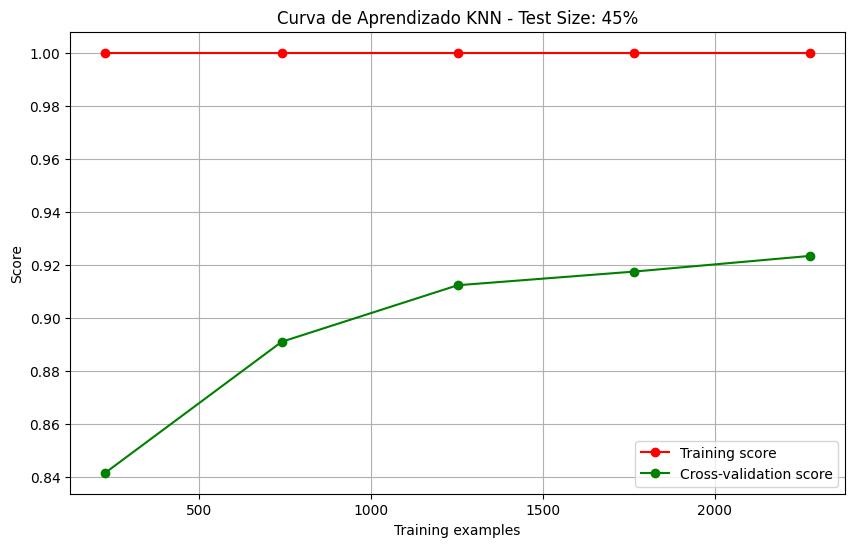

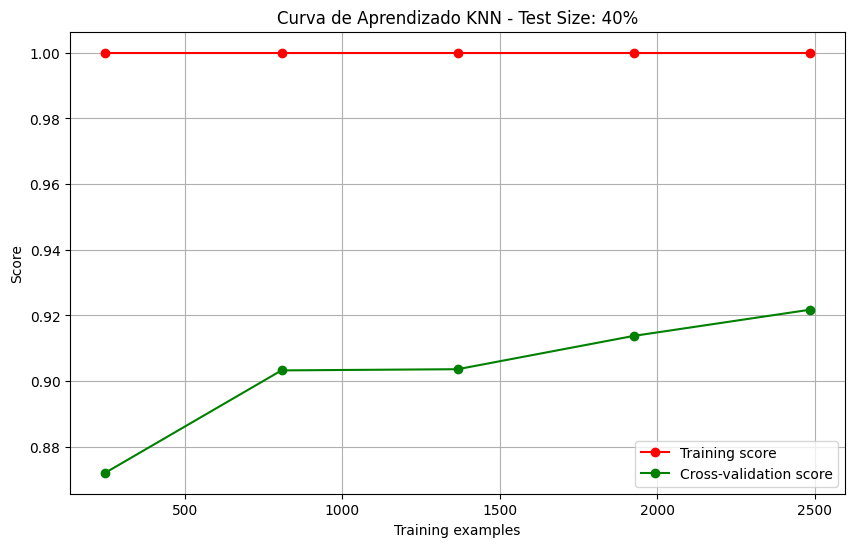

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


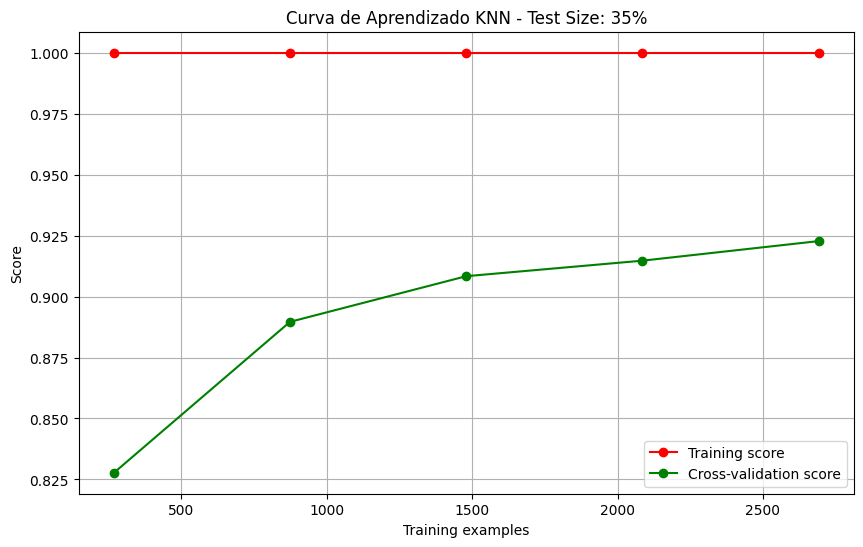

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


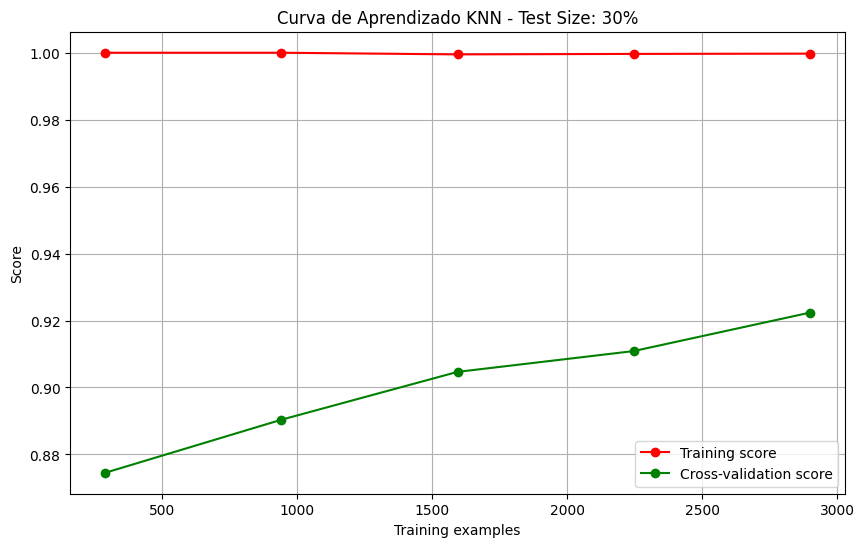

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


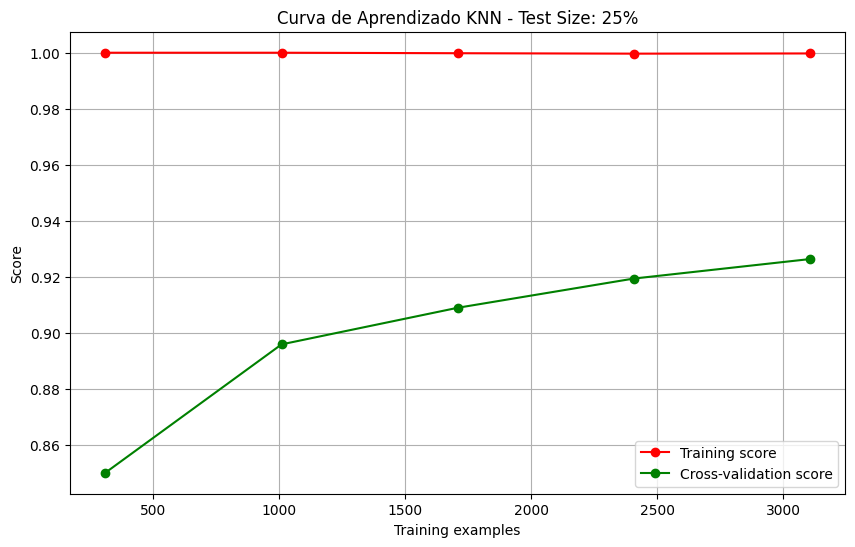

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


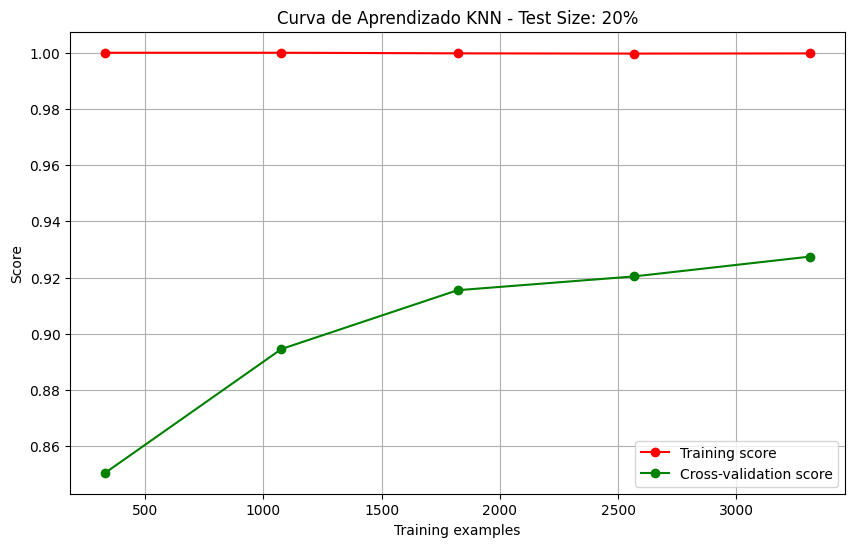

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


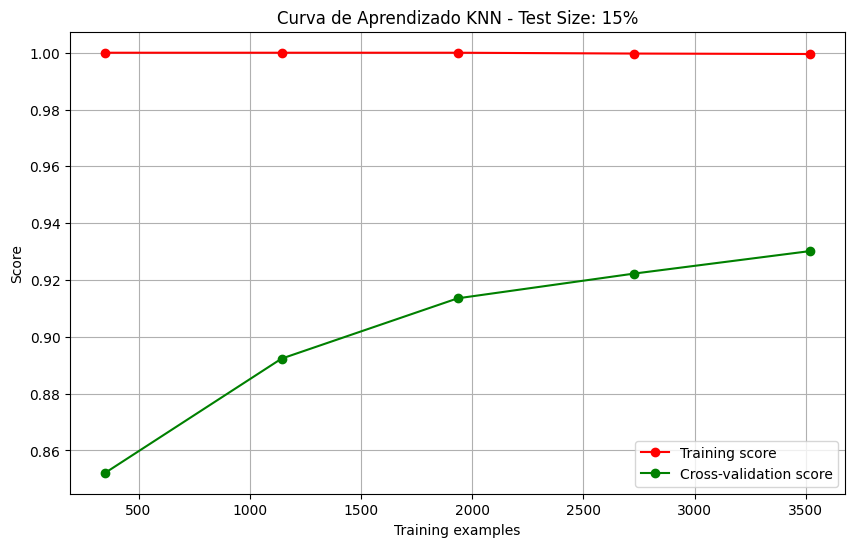

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


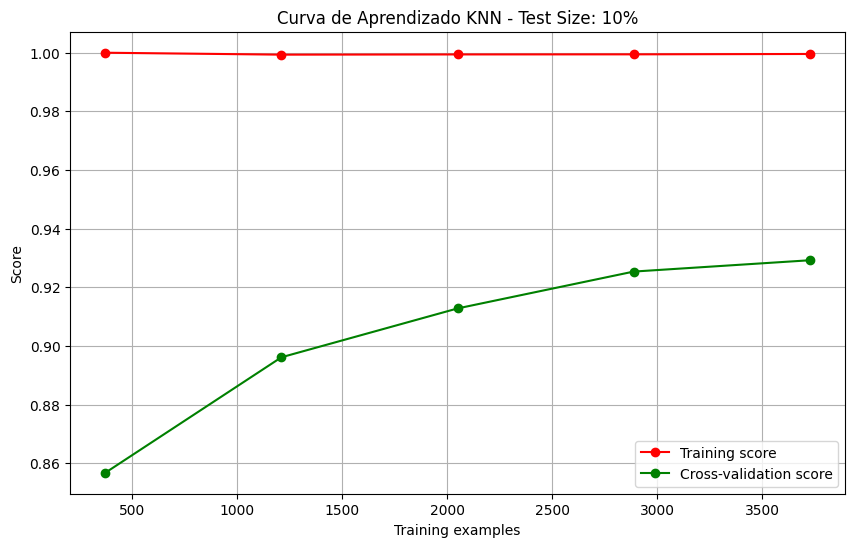

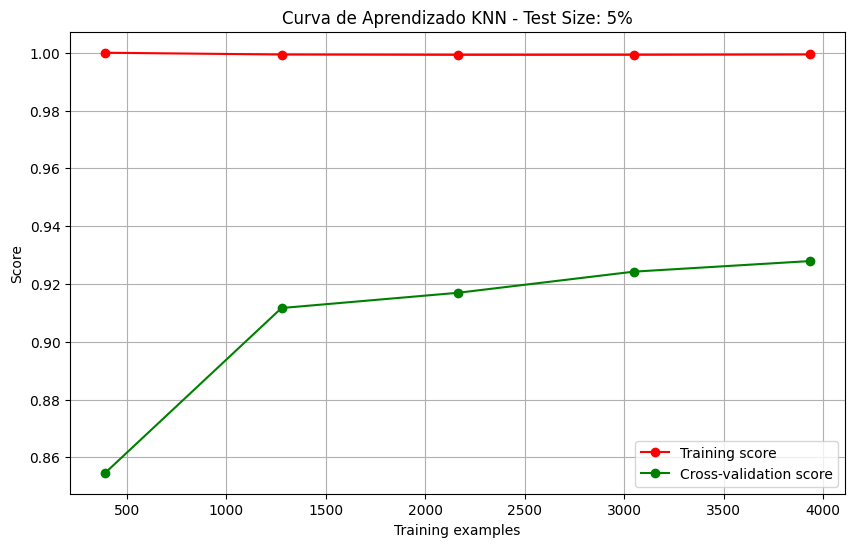

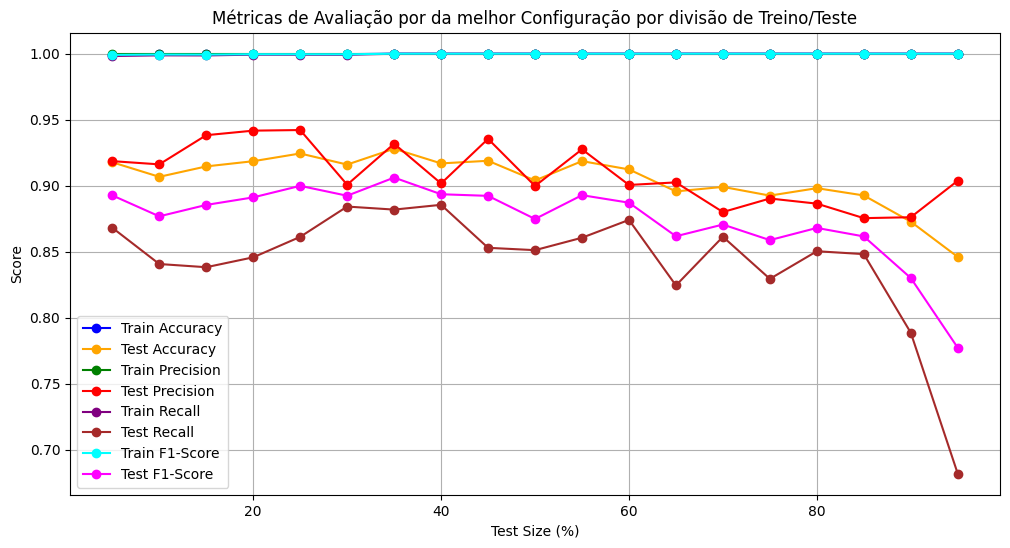

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Listas para armazenar as métricas
train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_f1s = []
test_f1s = []
train_sizes_list = []

# Loop sobre as diferentes configurações de treino/teste
test_sizes = np.arange(0.95, 0.00, -0.05)  # Test sizes from 95% to 5%

for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42, stratify=Y)
    
    # Padronizando os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Busca por hiperparâmetros
    param_grid = {
        'n_neighbors': range(3,30),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    cv_strategy = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv_strategy, n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    best_params = grid_search.best_params_
    
    # Criando e treinando o modelo
    knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], metric=best_params['metric'])
    knn.fit(X_train, Y_train)
    
    # Gerando a curva de aprendizado
    train_sizes, train_scores, test_scores = learning_curve(knn, X_train, Y_train, cv=cv_strategy, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_sizes_list.append(train_sizes)
    
    # Plotando a curva de aprendizado
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.title(f'Curva de Aprendizado KNN - Test Size: {test_size * 100:.0f}%')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
    # Coletando as métricas de avaliação
    Y_train_pred = knn.predict(X_train)
    Y_test_pred = knn.predict(X_test)
    
    train_accuracies.append(accuracy_score(Y_train, Y_train_pred))
    test_accuracies.append(accuracy_score(Y_test, Y_test_pred))
    train_precisions.append(precision_score(Y_train, Y_train_pred))
    test_precisions.append(precision_score(Y_test, Y_test_pred))
    train_recalls.append(recall_score(Y_train, Y_train_pred))
    test_recalls.append(recall_score(Y_test, Y_test_pred))
    train_f1s.append(f1_score(Y_train, Y_train_pred))
    test_f1s.append(f1_score(Y_test, Y_test_pred))

# Plotando métricas por configuração
test_sizes_percent = [size * 100 for size in test_sizes]
plt.figure(figsize=(12, 6))
plt.plot(test_sizes_percent, train_accuracies, 'o-', label='Train Accuracy', color='blue')
plt.plot(test_sizes_percent, test_accuracies, 'o-', label='Test Accuracy', color='orange')
plt.plot(test_sizes_percent, train_precisions, 'o-', label='Train Precision', color='green')
plt.plot(test_sizes_percent, test_precisions, 'o-', label='Test Precision', color='red')
plt.plot(test_sizes_percent, train_recalls, 'o-', label='Train Recall', color='purple')
plt.plot(test_sizes_percent, test_recalls, 'o-', label='Test Recall', color='brown')
plt.plot(test_sizes_percent, train_f1s, 'o-', label='Train F1-Score', color='cyan')
plt.plot(test_sizes_percent, test_f1s, 'o-', label='Test F1-Score', color='magenta')
plt.xlabel('Test Size (%)')
plt.ylabel('Score')
plt.title('Métricas de Avaliação por da melhor Configuração por divisão de Treino/Teste') 
plt.legend()
plt.grid()
plt.show()

___
### Conclusão

Os dados utilizados para treinar o modelo KNN não se encaixaram bem, resultando em overfitting. Isso é evidenciado pela alta acurácia, precisão e F1-score no conjunto de treinamento, enquanto as mesmas métricas no conjunto de teste são significativamente menores. O modelo KNN conseguiu memorizar os dados de treinamento, mas não conseguiu generalizar bem para novos dados, indicando que o modelo está superajustado aos dados de treinamento.